# Computing probabilities in Python with "scipy"

# Discrete distributions

## PMF:

How much probability I will get?

### Binomial distribution

In [ ]:
# Combining probabilities

# Listen yourself
# If you say: What is the probability of getting X OR Y -> Add probabilities (+)
# If you say: What is the probability of getting X AND Y -> Multiply probabilities (*)

In [1]:
from scipy.stats import binom

#binom.pmf(succesful_trials,trials,probability_of_success)
# pmf = probability mass function
#P(x>1) = P(x=2)+P(x=3)...+P(x=5)
P_more_than_1 = sum([binom.pmf(x,5,1/2) for x in [2,3,4,5]])
P_more_than_1
# #P(x>1) = 1- ((P(x=0)+P(x=1))



0.8124999999999997

### Poisson distribution

In [2]:
from scipy.stats import poisson

# P(x < value) = P(x = 0) + P(x = 1) + ....+ P(x = value -1) 
#poisson.cdf(counts, mean)
# poisson.cdf(10, 7) = p(counts = 0, mean = 7) + p(counts = 1, mean = 7) + p(counts = 2, mean = 7) + p(counts = 3, mean = 7)
# +....p(counts = 10, mean = 7)
# P(z>2) = 1-poisson.cdf(2,7)
poisson.cdf(10, 7)

0.9014792058890873

In [3]:
1-poisson.cdf(10,7)

0.09852079411091275

In [6]:
poisson.pmf(0,7), poisson.pmf(1,7), poisson.pmf(2,7)

(0.0009118819655545162, 0.0063831737588816145, 0.022341108156085643)

In [7]:
[ poisson.pmf(count,7) for count in range(15)]

[0.0009118819655545162,
 0.0063831737588816145,
 0.022341108156085643,
 0.052129252364199796,
 0.09122619163734964,
 0.1277166682922895,
 0.14900277967433773,
 0.14900277967433773,
 0.1303774322150455,
 0.10140466950059107,
 0.07098326865041356,
 0.04517117095935416,
 0.026349849726289943,
 0.014188380621848464,
 0.007094190310924194]

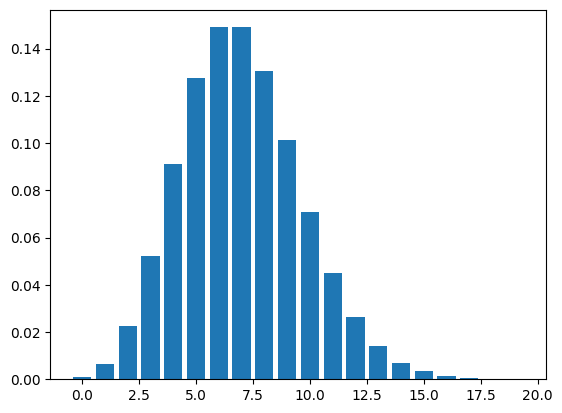

In [10]:
import matplotlib.pyplot as plt

plt.bar(x=list(range(20)), height=[ poisson.pmf(count,7) for count in range(20)])
plt.show()

In [13]:
#poisson.cdf(1,7) = poisson.pmf(0,7) + poisson.pmf(1,7) + poisson.pmf(2,7)
print(poisson.pmf(0,7),poisson.pmf(1,7),poisson.pmf(2,7), poisson.pmf(0,7)+poisson.pmf(1,7)+poisson.pmf(2,7))
print(poisson.cdf(2,7))

0.0009118819655545162 0.0063831737588816145 0.022341108156085643 0.029636163880521774
0.029636163880521763


In [ ]:
# Labs. 
# count number of labs/week.
# Week_1: number_of_labs_1
# Week_2: number_of_labs_2
# Week_3: number_of_labs_3
# Week_4: number_of_labs_4
#....
# Week_2: number_of_labs_2
# mean_number =mean(number_of_labs_1,number_of_labs_2,number_of_labs_3,number_of_labs_4)
# poisson.pmf(labs, mean_number)

# Continuous distributions

# CDF: 

How much probability I will get if I add the probabilities until a given value?

For discrete:
$$P(x < value) = \sum_{values< value} P(x = value)$$

For continuous:

$$P(x < value) = ∫_{min_value}^{value} P(x = value )dx$$

If our distribution is continuous, it doesn't make sense to ask about the probability of getting one particular value. In contrast we can ourselfves what is the probability of getting values below a given one: $P(x < value)$ which is the area under the distribution until value.

### Uniform distribution

In [14]:
from scipy.stats import uniform

# P(x < value)?
# P(x < value) = \int_{min_value}^{value} P(x = value) dx
# uniform.cdf(value,min_value,max_value) 
uniform.cdf(360/20,  0,          360) # cdf = continuous distribution fuction

0.05

### Normal distribution

In [27]:
from scipy.stats import norm

# P(x <= value)     
#norm.cdf(value, mean, sd)
norm.cdf(12, 12, 7)

0.5

### Exponential distribution

In [16]:
from scipy.stats import expon

# P(x <= value)
# expon.cdf(value,scale = lambda)
expon.cdf(2, 1)

0.6321205588285577

### Chi2 distribution

In [17]:
from scipy.stats import chi2

# P(x <= value)
# chi2.cdf(value,degrees_of_freedom) # nu
chi2.cdf(3,2)

0.7768698398515702

### t-student Distribution

In [21]:
from scipy.stats import t

# P(x <= value)
# t.cdf(value, degrees_of_freedom) # nu
t.cdf(0,6)

0.5

In [ ]:
# norm.cdf(value, mean, standard_deviation)
norm.cdf(0, 0, 1)

0.5

# Activity

* Can you guess why the previous cdf is 0.5?

* Increase the degrees of freedom by 3 and compute the new cdf.

* Set the number of degrees of freedom to 40 and re-compute the t.cdf

* Compare the previous value against the norm.cdf(0, 0, 1). 

# PPF

Now the question is up to which value I need to add probabilities to get a given amount of probability?

In other words, solve the following question:

$$P(x < value) = probability $$

what is the "value" in the previous equation? 

For example, given the normal distribution what is the value that I need to plug in order to obtain a total probability of 0.5?

* P( x < value ) = 0.5


# Activity

* What is the "value" for the previous example?

**PPFs are the opposite functions of CDFs!!!**

## Binomial distribution

In [28]:
# binom.ppf(total_probability, number_of_trials, probability_of_success)
binom.ppf(0.9,10,0.5)

7.0

## Poisson

In [ ]:
# poisson.ppf(total_probability, mean)
poisson.ppf(0.7, 5)

6.0

## Uniform distribution

In [29]:
## uniform.ppf(total_probability, min_value, max_value)

uniform.ppf(0.6, 2, 7)

6.2

## Normal distribution

In [30]:
## norm.ppf(total_probability, mean, sd)

norm.ppf(0.8,0,1)

0.8416212335729143

In [31]:
norm.cdf(0.8416212335729143,0,1)

0.8

## Exponential distribution

In [32]:
## expon.ppf(total_probability, lambda)

expon.ppf(0.7, 2)

3.203972804325936

In [33]:
expon.cdf(3.203972804325936, 2)

0.7

## Chi2 distribution

In [34]:
## chi2.ppf(total_probability, degrees_of_freedom)
chi2.ppf(0.8, 10)

13.441957574973113

In [35]:
chi2.cdf(13.441957574973113,10)

0.8

## t-student Distribution

In [36]:
## t.ppf(total_probability, degrees_of_freedom)
t.ppf(0.95, 5)

2.015048372669157

In [37]:
t.cdf(2.015048372669157,5)

0.9499999999576474